<a href="https://colab.research.google.com/github/Putrimaesarah/Analyzing-Stroke-Risk-Factors-Using-Logistic-Regression/blob/main/Final_Project_Categorical_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT DATA

In [ ]:
install.packages("readxl")
library(readxl)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data <- read_excel("/content/Data Stroke.xlsx")
data

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1


# Pre Processing

In [ ]:
# Data Cleaning & EDA
summary(data)  # Ringkasan data
str(data) # cek tipe data


    gender              age             hypertension     heart_disease    
 Length:5110        Length:5110        Min.   :0.00000   Min.   :0.00000  
 Class :character   Class :character   1st Qu.:0.00000   1st Qu.:0.00000  
 Mode  :character   Mode  :character   Median :0.00000   Median :0.00000  
                                       Mean   :0.09746   Mean   :0.05401  
                                       3rd Qu.:0.00000   3rd Qu.:0.00000  
                                       Max.   :1.00000   Max.   :1.00000  
 ever_married        work_type         Residence_type     avg_glucose_level 
 Length:5110        Length:5110        Length:5110        Length:5110       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

tibble [5,110 × 11] (S3: tbl_df/tbl/data.frame)
 $ gender           : chr [1:5110] "Male" "Female" "Male" "Female" ...
 $ age              : chr [1:5110] "67" "61" "80" "49" ...
 $ hypertension     : num [1:5110] 0 0 0 0 1 0 1 0 0 0 ...
 $ heart_disease    : num [1:5110] 1 0 1 0 0 0 1 0 0 0 ...
 $ ever_married     : chr [1:5110] "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr [1:5110] "Private" "Self-employed" "Private" "Private" ...
 $ Residence_type   : chr [1:5110] "Urban" "Rural" "Rural" "Urban" ...
 $ avg_glucose_level: chr [1:5110] "228.69" "202.21" "105.92" "171.23" ...
 $ bmi              : chr [1:5110] "36.6" "N/A" "32.5" "34.4" ...
 $ smoking_status   : chr [1:5110] "formerly smoked" "never smoked" "never smoked" "smokes" ...
 $ stroke           : num [1:5110] 1 1 1 1 1 1 1 1 1 1 ...


In [ ]:
# ubah data ke numeric
data$bmi <-as.numeric(data$bmi)
data$avg_glucose_level <-as.numeric(data$avg_glucose_level)
data$age <-as.numeric(data$age)

# Konversi variabel kategorik menjadi factor
data$gender <- as.factor(data$gender)
data$ever_married <- as.factor(data$ever_married)
data$work_type <- as.factor(data$work_type)
data$Residence_type <- as.factor(data$Residence_type)
data$smoking_status <- as.factor(data$smoking_status)
data$hypertension <- as.factor(data$hypertension)
data$heart_disease <- as.factor(data$heart_disease)

# Konversi faktor ke numeric biner
data$stroke <- as.numeric(as.character(data$stroke))
# Pastikan hanya ada nilai 0 dan 1
table(data$stroke)



Warning message:
“NAs introduced by coercion”



   0    1 
4861  249 

In [ ]:
summary(data)

    gender          age        hypertension heart_disease ever_married
 Female:2994   Min.   : 0.08   0:4612       0:4834        No :1757    
 Male  :2115   1st Qu.:25.00   1: 498       1: 276        Yes:3353    
 Other :   1   Median :45.00                                          
               Mean   :43.23                                          
               3rd Qu.:61.00                                          
               Max.   :82.00                                          
                                                                      
         work_type    Residence_type avg_glucose_level      bmi       
 children     : 687   Rural:2514     Min.   : 55.12    Min.   :10.30  
 Govt_job     : 657   Urban:2596     1st Qu.: 77.25    1st Qu.:23.50  
 Never_worked :  22                  Median : 91.89    Median :28.10  
 Private      :2925                  Mean   :106.15    Mean   :28.89  
 Self-employed: 819                  3rd Qu.:114.09    3rd Qu.:33.10  
      

In [ ]:
# Menghapus baris dengan nilai "other" dalam kolom gender (Noise)
data <- data[data$gender != "Other", ]
# Cek apakah masih ada baris dengan "other"
table(data$gender)


#Cek missing value
colSums(is.na(data))

# Imputasi mv dengan mean
mean_bmi <- mean(data$bmi, na.rm = TRUE)
mean_bmi
data$bmi[is.na(data$bmi)] <- mean_bmi

summary(data) # cek lagi
str(data)



Female   Male  Other 
  2994   2115      0 

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
              201                 0                 0

[1] 28.89456

    gender          age        hypertension heart_disease ever_married
 Female:2994   Min.   : 0.08   0:4611       0:4833        No :1756    
 Male  :2115   1st Qu.:25.00   1: 498       1: 276        Yes:3353    
 Other :   0   Median :45.00                                          
               Mean   :43.23                                          
               3rd Qu.:61.00                                          
               Max.   :82.00                                          
         work_type    Residence_type avg_glucose_level      bmi       
 children     : 687   Rural:2513     Min.   : 55.12    Min.   :10.30  
 Govt_job     : 657   Urban:2596     1st Qu.: 77.24    1st Qu.:23.80  
 Never_worked :  22                  Median : 91.88    Median :28.40  
 Private      :2924                  Mean   :106.14    Mean   :28.89  
 Self-employed: 819                  3rd Qu.:114.09    3rd Qu.:32.80  
                                     Max.   :271.74    Max.   :97.60  
      

tibble [5,109 × 11] (S3: tbl_df/tbl/data.frame)
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 2 1 1 1 ...
 $ age              : num [1:5109] 67 61 80 49 79 81 74 69 59 78 ...
 $ hypertension     : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 2 1 1 1 ...
 $ heart_disease    : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 2 1 1 1 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 1 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 2 1 2 1 2 ...
 $ avg_glucose_level: num [1:5109] 229 202 106 171 174 ...
 $ bmi              : num [1:5109] 36.6 28.9 32.5 34.4 24 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 1 2 2 4 4 ...
 $ stroke           : num [1:5109] 1 1 1 1 1 1 1 1 1 1 ...


# ASUMSI MODEL AWAL

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [ ]:
# variabel : gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status (ada 10)

# Asumsi Model Awal dengan interaksi
glm.logit <- glm(stroke ~ avg_glucose_level + Residence_type + work_type + ever_married + bmi + heart_disease*hypertension +age*heart_disease + age*hypertension + smoking_status*gender,
                 family = binomial(link = "logit"),data = data)
summary(glm.logit)

# Cek Multikolinearitas
library(car)
vif(glm.logit)
#alias(glm.logit)

# Model Selection
#Backward
step(glm.logit, direction = "backward")

# Stepwise
step(glm.logit, direction = "both")

# Forward
# Membuat model regresi logistik awal (tanpa prediktor)
glm.null <- glm(stroke ~ 1, family = binomial(link = "logit"), data = data)

# Melakukan seleksi maju menggunakan step()
step(glm.null, direction = "forward", scope = ~ gender + avg_glucose_level + Residence_type + ever_married + bmi +smoking_status + work_type + heart_disease*hypertension +age*heart_disease + age*hypertension)




Call:
glm(formula = stroke ~ avg_glucose_level + Residence_type + work_type + 
    ever_married + bmi + heart_disease * hypertension + age * 
    heart_disease + age * hypertension + smoking_status * gender, 
    family = binomial(link = "logit"), data = data)

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                            -6.815132   0.793585  -8.588  < 2e-16
avg_glucose_level                       0.003885   0.001202   3.233  0.00122
Residence_typeUrban                     0.070406   0.138235   0.509  0.61053
work_typeGovt_job                      -1.166791   0.852573  -1.369  0.17114
work_typeNever_worked                 -10.349112 309.501676  -0.033  0.97333
work_typePrivate                       -1.031307   0.836513  -1.233  0.21763
work_typeSelf-employed                 -1.410105   0.855842  -1.648  0.09943
ever_marriedYes                        -0.203064   0.225201  -0.902  0.36721
bmi                           

Loading required package: carData

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
avg_glucose_level,1.121441,1,1.058981
Residence_type,1.009382,1,1.004680
work_type,1.498642,4,1.051870
ever_married,1.106981,1,1.052132
bmi,1.128648,1,1.062379
heart_disease,52.827435,1,7.268248
hypertension,40.862915,1,6.392411
age,1.769327,1,1.330161
smoking_status,7.075194,3,1.385553
gender,3.637534,1,1.907232


Start:  AIC=1618.36
stroke ~ avg_glucose_level + Residence_type + work_type + ever_married + 
    bmi + heart_disease * hypertension + age * heart_disease + 
    age * hypertension + smoking_status * gender

                             Df Deviance    AIC
- smoking_status:gender       3   1576.4 1614.4
- bmi                         1   1574.4 1616.4
- Residence_type              1   1574.6 1616.6
- heart_disease:hypertension  1   1575.0 1617.0
- work_type                   4   1581.0 1617.0
- hypertension:age            1   1575.1 1617.1
- ever_married                1   1575.2 1617.2
<none>                            1574.4 1618.4
- heart_disease:age           1   1577.2 1619.2
- avg_glucose_level           1   1584.5 1626.5

Step:  AIC=1614.37
stroke ~ avg_glucose_level + Residence_type + work_type + ever_married + 
    bmi + heart_disease + hypertension + age + smoking_status + 
    gender + heart_disease:hypertension + heart_disease:age + 
    hypertension:age

                    


Call:  glm(formula = stroke ~ avg_glucose_level + heart_disease + hypertension + 
    age + heart_disease:age, family = binomial(link = "logit"), 
    data = data)

Coefficients:
       (Intercept)   avg_glucose_level      heart_disease1       hypertension1  
         -7.646978            0.004033            2.745935            0.378696  
               age  heart_disease1:age  
          0.071512           -0.033691  

Degrees of Freedom: 5108 Total (i.e. Null);  5103 Residual
Null Deviance:	    1990 
Residual Deviance: 1588 	AIC: 1600

Start:  AIC=1618.36
stroke ~ avg_glucose_level + Residence_type + work_type + ever_married + 
    bmi + heart_disease * hypertension + age * heart_disease + 
    age * hypertension + smoking_status * gender

                             Df Deviance    AIC
- smoking_status:gender       3   1576.4 1614.4
- bmi                         1   1574.4 1616.4
- Residence_type              1   1574.6 1616.6
- heart_disease:hypertension  1   1575.0 1617.0
- work_type                   4   1581.0 1617.0
- hypertension:age            1   1575.1 1617.1
- ever_married                1   1575.2 1617.2
<none>                            1574.4 1618.4
- heart_disease:age           1   1577.2 1619.2
- avg_glucose_level           1   1584.5 1626.5

Step:  AIC=1614.37
stroke ~ avg_glucose_level + Residence_type + work_type + ever_married + 
    bmi + heart_disease + hypertension + age + smoking_status + 
    gender + heart_disease:hypertension + heart_disease:age + 
    hypertension:age

                    


Call:  glm(formula = stroke ~ avg_glucose_level + heart_disease + hypertension + 
    age + heart_disease:age, family = binomial(link = "logit"), 
    data = data)

Coefficients:
       (Intercept)   avg_glucose_level      heart_disease1       hypertension1  
         -7.646978            0.004033            2.745935            0.378696  
               age  heart_disease1:age  
          0.071512           -0.033691  

Degrees of Freedom: 5108 Total (i.e. Null);  5103 Residual
Null Deviance:	    1990 
Residual Deviance: 1588 	AIC: 1600

Start:  AIC=1992.27
stroke ~ 1

                    Df Deviance    AIC
+ age                1   1616.2 1620.2
+ avg_glucose_level  1   1917.9 1921.9
+ ever_married       1   1919.3 1923.3
+ work_type          4   1920.5 1930.5
+ hypertension       1   1929.2 1933.2
+ heart_disease      1   1930.0 1934.0
+ smoking_status     3   1962.1 1970.1
+ bmi                1   1983.0 1987.0
<none>                   1990.3 1992.3
+ Residence_type     1   1989.1 1993.1
+ gender             1   1989.8 1993.8

Step:  AIC=1620.25
stroke ~ age

                    Df Deviance    AIC
+ avg_glucose_level  1   1599.8 1605.8
+ hypertension       1   1608.2 1614.2
+ heart_disease      1   1611.3 1617.3
<none>                   1616.2 1620.2
+ work_type          4   1609.1 1621.1
+ bmi                1   1615.1 1621.1
+ gender             1   1615.5 1621.5
+ ever_married       1   1615.7 1621.7
+ Residence_type     1   1615.8 1621.8
+ smoking_status     3   1613.0 1623.0

Step:  AIC=1605.79
stroke ~ age + av


Call:  glm(formula = stroke ~ age + avg_glucose_level + hypertension + 
    heart_disease + age:heart_disease, family = binomial(link = "logit"), 
    data = data)

Coefficients:
       (Intercept)                 age   avg_glucose_level       hypertension1  
         -7.646978            0.071512            0.004033            0.378696  
    heart_disease1  age:heart_disease1  
          2.745935           -0.033691  

Degrees of Freedom: 5108 Total (i.e. Null);  5103 Residual
Null Deviance:	    1990 
Residual Deviance: 1588 	AIC: 1600

In [ ]:
# Pakai model hasil forward karena AIC = 1600 (ASUMSI MODEL AWAL LANGSUNG DENGAN INTERAKSI)
glm.fit <- glm(stroke ~ avg_glucose_level + hypertension + age*heart_disease, family = binomial(link = "logit"), data = data)
summary(glm.fit)
vif(glm.fit)


glm.fit2 <- glm(stroke ~ avg_glucose_level + hypertension + age + heart_disease, family = binomial(link = "logit"), data = data)
summary(glm.fit2)
#vif(glm.fit2)

#LRT perbandingan model
anova(glm.fit2,glm.fit,  test = "Chisq")

#glm.fit3 <- glm(stroke ~ avg_glucose_level + hypertension + age , family = binomial(link = "logit"), data = data)
#summary(glm.fit3)
#vif(glm.fit3)

#LRT perbandingan model
#anova(glm.fit3,glm.fit,  test = "Chisq")


#LRT perbandingan model
#anova(glm.fit3,glm.fit2,  test = "Chisq")

#lrt
anova(glm.fit,glm.logit, test = "Chisq")


Call:
glm(formula = stroke ~ avg_glucose_level + hypertension + age * 
    heart_disease, family = binomial(link = "logit"), data = data)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -7.646978   0.376319 -20.320  < 2e-16 ***
avg_glucose_level   0.004033   0.001161   3.474 0.000513 ***
hypertension1       0.378696   0.162217   2.335 0.019569 *  
age                 0.071512   0.005430  13.170  < 2e-16 ***
heart_disease1      2.745935   1.293066   2.124 0.033705 *  
age:heart_disease1 -0.033691   0.018075  -1.864 0.062329 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1990.3  on 5108  degrees of freedom
Residual deviance: 1588.3  on 5103  degrees of freedom
AIC: 1600.3

Number of Fisher Scoring iterations: 7


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



avg_glucose_level      hypertension               age     heart_disease 
         1.052454          1.043556          1.155653         51.777491 
age:heart_disease 
        52.469989


Call:
glm(formula = stroke ~ avg_glucose_level + hypertension + age + 
    heart_disease, family = binomial(link = "logit"), data = data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -7.488996   0.357890 -20.925  < 2e-16 ***
avg_glucose_level  0.004121   0.001162   3.547  0.00039 ***
hypertension1      0.381396   0.162599   2.346  0.01899 *  
age                0.068920   0.005140  13.408  < 2e-16 ***
heart_disease1     0.329972   0.187724   1.758  0.07879 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1990.3  on 5108  degrees of freedom
Residual deviance: 1591.4  on 5104  degrees of freedom
AIC: 1601.4

Number of Fisher Scoring iterations: 7


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5104,1591.446,NA,NA,NA
2,5103,1588.262,1,3.183843,0.07436963


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5103,1588.262,NA,NA,NA
2,5087,1574.363,16,13.89928,0.606217


In [ ]:
glm.fit2 <- glm(stroke ~ avg_glucose_level + hypertension + age + heart_disease, family = binomial(link = "logit"), data = data)
summary(glm.fit2)
#vif(glm.fit2)

#LRT perbandingan model
anova(glm.fit2,glm.fit,  test = "Chisq")


Call:
glm(formula = stroke ~ avg_glucose_level + hypertension + age + 
    heart_disease, family = binomial(link = "logit"), data = data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -7.488996   0.357890 -20.925  < 2e-16 ***
avg_glucose_level  0.004121   0.001162   3.547  0.00039 ***
hypertension1      0.381396   0.162599   2.346  0.01899 *  
age                0.068920   0.005140  13.408  < 2e-16 ***
heart_disease1     0.329972   0.187724   1.758  0.07879 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1990.3  on 5108  degrees of freedom
Residual deviance: 1591.4  on 5104  degrees of freedom
AIC: 1601.4

Number of Fisher Scoring iterations: 7


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5104,1591.446,NA,NA,NA
2,5103,1588.262,1,3.183843,0.07436963


# MODEL CHECKING

## Uji hosmer-lemeshow

In [ ]:
# uji hosmer-lemeshow (model fit jika p-value besar)
install.packages("ResourceSelection")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pbapply’




In [ ]:
library(ResourceSelection)
predicted_probabilities <- predict(glm.fit, type = "response")
hoslem.test(data$stroke, predicted_probabilities, g = 10)


ResourceSelection 0.3-6 	 2023-06-27




	Hosmer and Lemeshow goodness of fit (GOF) test

data:  data$stroke, predicted_probabilities
X-squared = 8.1078, df = 8, p-value = 0.423


## classification table ( sehat = 4861 , stroke = 249)

In [ ]:
install.packages("gmodels")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’




In [ ]:
# 1. Hasilkan prediksi probabilitas dari model
pred_prob <- predict(glm.fit, newdata = data, type = "response")

# 2. Konversi probabilitas ke kategori berdasarkan cutoff
cutoff <- 0.01  # Atur cutoff (misalnya, 0.5)
pred_class <- ifelse(pred_prob >= cutoff, 1, 0)

# 3. Pastikan pred_class adalah faktor dengan level yang sesuai
pred_class <- factor(pred_class, levels = c(0, 1))

# 4. Pastikan target aktual (data$stroke) juga faktor dengan level yang sama
data$stroke <- factor(data$stroke, levels = c(0, 1))

# 5. Buat confusion matrix
confusion_matrix <- table(Predicted = pred_class, Actual = data$stroke)
print(confusion_matrix)

# 6. Hitung metrik evaluasi jika confusion matrix valid
if (all(dim(confusion_matrix) == c(2, 2))) {
  TP <- confusion_matrix[2, 2] # True Positives
  TN <- confusion_matrix[1, 1] # True Negatives
  FP <- confusion_matrix[2, 1] # False Positives
  FN <- confusion_matrix[1, 2] # False Negatives

  accuracy <- (TP + TN) / sum(confusion_matrix)
  error <- (FP + FN) / sum(confusion_matrix)
  sensitivity <- ifelse((TP + FN) > 0, TP / (TP + FN), NA) # True Positive Rate
  specificity <- ifelse((TN + FP) > 0, TN / (TN + FP), NA) # True Negative Rate

  cat("Accuracy:", accuracy, "\n")
  cat("Error:", error, "\n")
  cat("Sensitivity:", sensitivity, "\n")
  cat("Specificity:", specificity, "\n")
} else {
  cat("Confusion matrix tidak lengkap. Periksa distribusi data prediksi atau data aktual.\n")
}


         Actual
Predicted    0    1
        0 1985    4
        1 2875  245
Accuracy: 0.4364846 
Error: 0.5635154 
Sensitivity: 0.9839357 
Specificity: 0.4084362 


## Kurva ROC

In [ ]:
#kurva ROC
install.packages("pROC")
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.844548564628886"


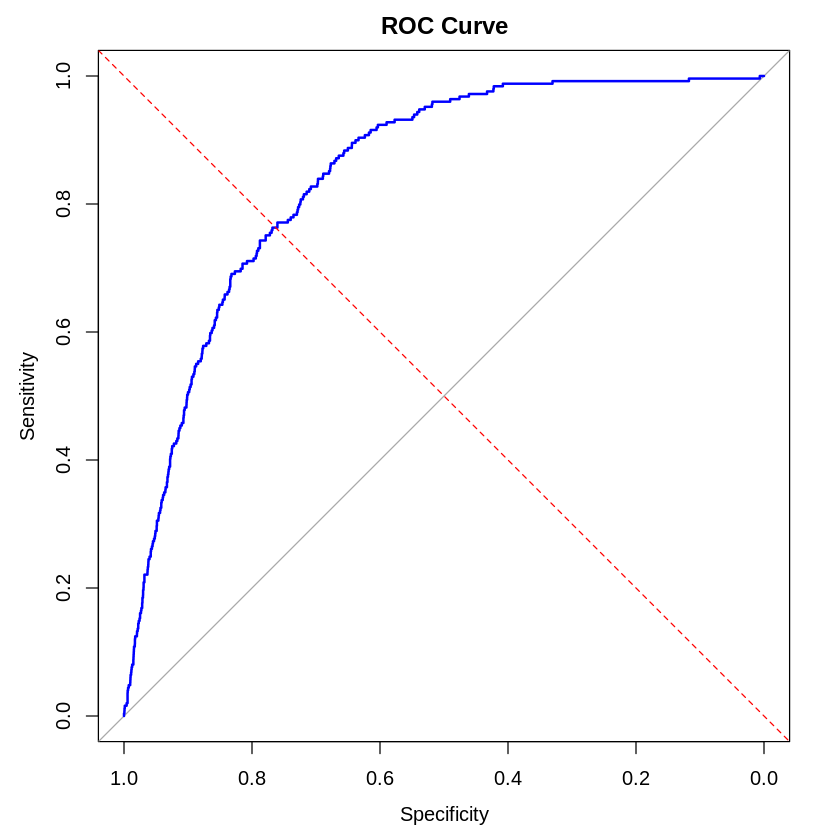

In [ ]:
predicted_probabilities_roc <- predict(glm.fit, type = "response")
roc_curve <- roc(data$stroke,predicted_probabilities_roc)

# Plot kurva ROC
plot(roc_curve, col = "blue", lwd = 2, main = "ROC Curve")
abline(a = 0, b = 1, lty = 2, col = "red") # Garis diagonal (baseline)

# AUC
auc_value <- auc(roc_curve)
print(paste("AUC:", auc_value))

In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

install.packages("dplyr")

library(pROC)
library(dplyr)

# Hitung ROC Curve
roc_obj <- roc(data$stroke, data$pred_prob)

# Plot ROC Curve
plot(roc_obj, col = "blue", main = "ROC Curve", print.thres = TRUE)
abline(a = 0, b = 1, lty = 2, col = "red")

# Tentukan nilai cut-off optimal berdasarkan sensitivitas dan spesifisitas
coords_optimal <- coords(roc_obj, "best", ret = c("threshold", "sensitivity", "specificity"))
optimal_cutoff <- coords_optimal["threshold"]

# Tambahkan evaluasi dengan F1-score untuk setiap threshold
thresholds <- roc_obj$thresholds
f1_scores <- sapply(thresholds, function(threshold) {
  predicted <- ifelse(data$pred_prob >= threshold, 1, 0)
  tp <- sum(predicted == 1 & data$stroke == 1)
  fp <- sum(predicted == 1 & data$stroke == 0)
  fn <- sum(predicted == 0 & data$stroke == 1)

  precision <- ifelse(tp + fp > 0, tp / (tp + fp), 0)
  recall <- ifelse(tp + fn > 0, tp / (tp + fn), 0)
  f1 <- ifelse(precision + recall > 0, 2 * (precision * recall) / (precision + recall), 0)
  return(f1)
})

# Cari threshold dengan F1-score terbaik
best_f1_idx <- which.max(f1_scores)
best_f1_cutoff <- thresholds[best_f1_idx]
best_f1 <- f1_scores[best_f1_idx]

# Output nilai cut-off optimal dan metriknya
cat("Optimal Cut-off (based on Sensitivity/Specificity):", optimal_cutoff, "\n")
cat("Optimal Cut-off (based on F1-Score):", best_f1_cutoff, "\n")
cat("Best F1-Score:", best_f1, "\n")

# Plot F1-Score vs Threshold
plot(thresholds, f1_scores, type = "l", col = "blue", xlab = "Threshold", ylab = "F1-Score",
     main = "F1-Score vs Threshold")
abline(v = best_f1_cutoff, col = "

ERROR: Error in parse(text = input): <text>:45:34: unexpected INCOMPLETE_STRING
44:      main = "F1-Score vs Threshold")
45: abline(v = best_f1_cutoff, col = "
                                     ^


In [ ]:
# Tambahkan ke kurva ROC
#pred_obj <- prediction(pred, labels)
perf <- performance(pred_prob, "tpr", "fpr")

# Plot kurva ROC
plot(perf, colorize = TRUE, main = "ROC Curve with Cutoff")
abline(a = 0, b = 1, lty = 2, col = "gray") # Garis diagonal

# Tambahkan titik cutoff pada kurva
points(FPR, TPR, col = "red", pch = 19)
text(FPR, TPR, labels = paste("Cutoff =", cutoff), pos = 4)


ERROR: Error in performance(pred_prob, "tpr", "fpr"): could not find function "performance"


In [ ]:
# Library yang diperlukan
install.packages('DescTools')

library(dplyr)
library(reshape2)
library(ggplot2)
library(DescTools)

# Variabel kategorik dan kontinu
categorical_vars <- c("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status")
continuous_vars <- c("age", "avg_glucose_level", "bmi")

# Fungsi untuk menghitung eta-squared (ukuran efek ANOVA)
eta_squared <- function(continuous_var, categorical_var) {
  model <- aov(continuous_var ~ categorical_var)
  eta2 <- summary(model)[[1]]$Sum Sq[1] / sum(summary(model)[[1]]$Sum Sq)
  return(eta2)
}

# Membuat dataframe untuk menyimpan hasil eta-squared
eta_squared_matrix <- data.frame(matrix(ncol = length(categorical_vars), nrow = length(continuous_vars)))
colnames(eta_squared_matrix) <- categorical_vars
rownames(eta_squared_matrix) <- continuous_vars

# Menghitung eta-squared untuk setiap kombinasi variabel kontinu dan kategorik
for (cont_var in continuous_vars) {
  for (cat_var in categorical_vars) {
    eta_squared_matrix[cont_var, cat_var] <- eta_squared(data[[cont_var]], data[[cat_var]])
  }
}

# Melihat matriks eta-squared
print(eta_squared_matrix)

# Visualisasi heatmap dari matriks eta-squared
heatmap_data <- melt(eta_squared_matrix)
colnames(heatmap_data) <- c("Continuous_Variable", "Categorical_Variable", "Eta_Squared")

ggplot(heatmap_data, aes(x = Continuous_Variable, y = Categorical_Variable, fill = Eta_Squared)) +
  geom_tile(color = "white") +
  scale_fill_gradient(low = "blue", high = "red", name = "Eta-Squared") +
  labs(title = "Matriks Korelasi Eta-Squared: Variabel Kontinu dan Kategorik",
       x = "Variabel Kontinu",
       y = "Variabel Kategorik") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Data korelasi dalam format DataFrame
data = {
    'age': [0.0007701622, 0.07637885, 0.069578169, 0.46115563, 0.46526898, 1.968601e-04, 0.15994551],
    'avg_glucose_level': [0.0029945069, 0.03046421, 0.026213983, 0.02412713, 0.01284637, 2.287822e-05, 0.01073159],
    'bmi': [0.0006555921, 0.02564820, 0.001510526, 0.11260335, 0.19793147, 8.270679e-08, 0.07137097]
}

# Membuat DataFrame
correlation_df = pd.DataFrame(data, index=["gender", "hypertension", "heart_disease", "ever_married",
                                            "work_type", "Residence_type", "smoking_status"])

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Menambahkan judul dan label sumbu
plt.title('Heatmap Korelasi antara Variabel Kontinu dan Kategorik')
plt.xlabel('Variabel Kontinu')
plt.ylabel('Variabel Kategorik')

# Menampilkan plot
plt.show()
hahahhaa